In [91]:
import xml.etree.ElementTree as ET
import os
import numpy as np
import matplotlib.pyplot as plt 

In [92]:
#voor de meta-data file ParlaMint-NL.xml
#hierin staan alle namen met hun partij erbij
#deze functie maakt een dict met als key de naam van de politicus en als value zijn/haar partij

#een tree maken van het xml bestand aan de hand van zijn path
tree = ET.parse("full_dataset_output_second_pass_16_01/ParlaMint-NL.xml")
#de root node vinden van het xml bestand, hier staat wat algemene informatie, maar zorgt ook dat je er doorheen kan itereren
root = tree.getroot()
#dict aanmaken voor de namen en hun partijen
namen = {}
#met de for loop kan je itereren door de nodes onder de rootnode, zo loop je voorbij alle tags in de file
#hier zoek ik op de tag 'person' gek genoeg moet de header ervoor waardoor het '{http://www.tei-c.org/ns/1.0}person' wordt
for j in root.iter('{http://www.tei-c.org/ns/1.0}person'):
    #elke j is nu een branch in de xml tree vanaf de tag person met alles wat erbij hoort
    #attrib zorgt ervoor dat alles zoals id: wat nog in de tag staat kan worden ingelezen, ik doe hier expres id erachter tussen brackets omdat daar de naam staat
    naam = j.attrib['{http://www.w3.org/XML/1998/namespace}id']
    #try except omdat er bij sommige mensen geen partij staat, zoals Henk Krol nu geen partij heeft maar wel een zetel
    try:
        #in de find functie zoek ik naar affiliation, daar staat als attrib 'ref' de naam van de partij de[7:] is omdat er wat irrelevante chars voorstaan
        partij = j.find('{http://www.tei-c.org/ns/1.0}affiliation').attrib['ref'][7:]
    except AttributeError:
        partij = None
    except KeyError:
        partij = 'Chair'
    #Hier zet hij in de dict de naam als key met de gevonden partij erbij
    namen[naam] = partij
    
#voorbeeld:
namen['SigridKaag']

'D66'

In [85]:
{
    "tags": [
        "hide-input",
        "hide-output"
    ]
}

#in deze cel lees ik alle dingen die zijn gezegd naar een dict
#de dict is mijn geval een nested dict met als eerste twee keys covid of niet
#de tweede laag keys zijn de partijen met wat zij hebben gezegd
#vandaar dat ik de dict teksten, waar alles in komt te staan, al twee dicts geef met reference voor pre-covid en covid voor covid
teksten = {'#reference':{},'#covid':{}}
#met os lees ik de map met zijn path in, dit returnt een lijst met alle file namen
directory = os.listdir('full_dataset_output_second_pass_16_01')
#door de for loop is i de naam van een file in de map, ik heb wel de lijst met files gesort met sorted(), anders stonden ze niet goed op datum 
for i in sorted(directory):
    #hier check ik of de file met de meta-data niet perongeluk wordt meegenomen
    if i == 'ParlaMint-NL.xml':
        continue
    #hier join ik de naam van de path en de naam van de file omdat hij de file ander niet kan vinden bij het parsen
    i = os.path.join('full_dataset_output_second_pass_16_01', i)
    #hier maakt hij van de xml file een tree aan de hand van de tags
    tree = ET.parse(i)
    #hier krijgen we de root node van de tree is gemaakt door elementtree
    root = tree.getroot()
    #voor de tijd of het tijdens covid was of niet zoek ik in de attributes van de root node
    tijd = root.attrib['ana']
    #door weer door de root te gaan itereren kunnen we zoeken naar een tag die we willen gebruiken, die staat nu op u
    #in u staan in ieder geval de dingen die zijn uitgesproken 
    #vergeet niet '{http://www.tei-c.org/ns/1.0} voor de tag te zetten die je zoekt
    for text in root.iter('{http://www.tei-c.org/ns/1.0}u'):
        # in de u tag staan weer wat attributes, namelijk ana voor soort spreker, chair of regular
        #ik ben zelf niet zo geinteresseerd in de voorzitters uitspraken dus die haal ik er hier uit
        if text.attrib['ana'] == '#chair':
            continue
        #in u staat nog niet direct de uitspraken, in de xml tree zijn de childs van u 'seg'
        #in deze seg's staan de uitspraken. Let op ik gebruik hier findall i.p.v. find omdat er af en toe meer seg's onder 1 spreker staan
        #ik doe dit niet bij u omdat ik de u en hun bijbehorende seg's gescheiden wil houden
        for seg in text.findall('{http://www.tei-c.org/ns/1.0}seg'):
            #als tijd pre covid is heet het #reference en vandaar stop ik die in de nested dict die ik er eerder voor had gemaakt
            if tijd == '#reference':
                # dit ziet er ingewikkeld uit maar valt wel mee
                # het checkt eerst of de key, in dit geval de partij er al in staat zodat ie weet of hij moet appenden aan de key of de key nog moet aanmaken
                # de namen dict wordt hier aangehaald om i.p.v. de politicus die het heeft gezegd, het op te slaan voor de partij waar de politicus van lid is/was
                # vandaar namen
                # vervolgens staat hierachter in brackets text.attrib[who][1:]
                #hier is de text.attrib 'who' de naam van de persoon
                #[1:] de slice staat er om de # voor de naam weg te halen
                if namen[text.attrib['who'][1:]] in teksten[tijd].keys():
                    teksten[tijd][namen[text.attrib['who'][1:]]].append(seg.text)
                else:
                    teksten[tijd][namen[text.attrib['who'][1:]]] = [seg.text]
            #als de tijd in covid was wordt ie hier opgepikt voor de nested dict #covid
            else:
                if namen[text.attrib['who'][1:]] in teksten[tijd].keys():
                    teksten[tijd][namen[text.attrib['who'][1:]]].append(seg.text)
                else:
                    teksten[tijd][namen[text.attrib['who'][1:]]] = [seg.text]

                    
#bijvoorbeeld het laatste wat de vvd in de data heeft gezegd tijdens covid
print(teksten['#covid']['VVD'][-1]+'\n')
#bijvoorbeeld het laatste wat de SGP heeft gezegd in de data voor covid
print(teksten['#reference']['SGP'][-1])

De motie die de heer Otten net voordroeg, bevat een misverstand, namelijk dat er tijdsdruk is. Ik heb u al aangegeven dat dit kabinet niet van plan is om met aanvullende maatregelen te komen, zoals hypotheekrenteaftrek. Maar er is ook geen tijdsdruk die ons noodzaakt om snel voor de verkiezingen met andere standpunten te komen. Die motie ontraad ik dus.

Daar sluit ik mij bij aan, voorzitter.


# RQ 3: How have political parties changed how they talk about major political issues during the corona crisis?

As the Netherlands moves closer to the 2021 House of Representatives (Tweede Kamer der Staten-Generaal) elections, the importance of political information distribution increases once again. Having political knowledge affects one’s acceptance of democratic principles and increases political participation (Galston, 2001). To establish and maintain a successful democracy, it is thus necessary to provide its population with sufficient political resources and information. 

Knowing what topics political parties associate with major political issues can be useful to some voters. Generally, such associations can be derived from robust, ideological party foundations – one can assume that a so-called ‘green’ party, for example, will associate energy with sustainability. In times of crisis, however, priorities might shift, new associations might arise and contexts change.

The contexts in which parties place words and phrases are important because how parties talk about political issues can affect public opinion (Jacoby, 2000). This effect is called a framing effect and it can lead people to form inauthentic opinions. A way to mitigate framing effects is to provide insight into the frames that are at play (Baumer et al., 2017). 

Because of the importance of providing political information and the negative consequences that framing effects might have on opinion formation, one of the goals of this project is to provide a tool that can mitigate framing effects by creating insight into the context of political issues. It will do so by answering the following question: “How has the way political parties talk about major political issues changed during the corona crisis?”

## Experimental setup

### Data

For this research question, the aforementioned ParlaMint dataset was used. To find an answer to the question at hand, word embeddings of major political issues were examined. Specifically, the first and third most important issues for the 2021 elections, as determined by Een Vandaag (Lubbe, 2020) were used: health care and education. The second most import issue – Employment opportunities – was not used because it proved to be too small a topic during the corona crisis and therefore did not yield useful results. The parties VVD, PVV, and CDA were chosen because they currently hold the highest number of seats in the House of Representatives.

### Word2Vec

Word2Vec is a technique that uses a neural network to find word embeddings. It can be used with two different methods: Common Bag of Words (CBOW) and Skip Gram. Skip Gram was used in this research because it handles smaller amounts of data better. This is useful in this particular research because the data from during the corona crisis proved to be too small to generate good results with the CBOW method. Because infrequent words are not as important in this research, the minimum word count was not altered and thus kept at the standard value of 5.

### Preprocessing

To provide the right input for Word2Vec, each speaking turn had to be tokenized. Furthermore, punctuation was removed from the text, and upper case letters were converted to lower case, to avoid words such as ‘Thuiszorg’ and ‘thuiszorg’ being processed as two different words.


In [65]:
import string
import nltk
import gensim 
from gensim.models import Word2Vec
from sklearn.manifold import TSNE

# function to create appropriate input text for Word2Vec
def inputtext(text):
    inputtext = []
    # delete None values
    text = [i for i in text if i]
    # iterate through speaking turns
    for turn in text:
        # remove punctuation
        table = turn.maketrans('', '', string.punctuation)
        turn = turn.translate(table)
        # turn upper case letters into lower case
        turn = turn.lower()
        # tokenize
        turn = nltk.word_tokenize(turn)
        # add processed speaking turn to input text for Word2Vec
        inputtext.append(turn)    
    return inputtext

### Approach

The approach to answering this research questions consists of six main tasks, namely:
1.	Preprocess text<br>
Create the appropriate input text for the Word2Vec technique.
2.	Train Word2Vec models<br>
Train two separate Word2Vec models on all speaking turns of the input party from before and during the corona crisis.
3.	Find most similar words<br>
Find the five most similar words to the input word.
4.	Find word vectors<br>
Find the word vectors for the input word and the most similar words.
5.	Find t-SNE values<br>
Find the t-SNE values for the input word and the most similar words.
6.	Visualize<br>
Create two separate graphical representations of the word embedding of the input word from before and during the corona crisis.

To carry out these tasks, three functions were created, excluding the inputtext function which has already been discussed.

•	**Similar:** a function that finds the five most similar words to an input word from a text corpus.

•	**Gettsne:** a function that that converts a set of input vectors to a set of t-SNE values. T-SNE values are a two-dimensional representation of high-dimensional data. This function converts the vectors of the most similar words found by Word2Vec into two-dimensional data points that take into account the relative distances between the words.

•	**Compare:** a function that creates two graphical representations of the word embedding of an input word, one from before the corona crisis and one from during the corona crisis. This function carries out all six aforementioned tasks by calling the inputtext, similar, and gettsne functions, and plotting the results in two graphs.

### Implementation

See code below.

In [66]:
# function to return 5 most similar words to input word
def similar(word, party, model):
    # find 5 most similar words
    similar = model.wv.most_similar(word, topn=5)
    return similar

In [67]:
# function to return t-SNE coordinates for a list of vectors
def gettsne(vecs):
    array = np.array(vecs)
    # find t-SNE values
    tsne = TSNE(n_components=2).fit_transform(array)
    return tsne

In [68]:
# function to compare word embeddings from before and during corona crisis
def compare(word, party):
    
    # create appropriate input text for Word2Vec from before (ref)
    # and during (cov) corona crisis
    ref_text = inputtext(teksten['#reference'][party])
    cov_text = inputtext(teksten['#covid'][party])
    
    # train Word2Vec model for ref and cov texts
    ref_model = Word2Vec(ref_text, sg = 1)
    cov_model = Word2Vec(cov_text, sg = 1)
    
    # find most similar words for input word, based on trained model
    ref_similar = similar(word, party, ref_model)
    cov_similar = similar(word, party, cov_model)
    
    # initiate lists of vectors for most similar words and include word vector 
    # for input word so it will be included in the t-SNE calculation
    ref_vecs = [ref_model.wv[word]]
    cov_vecs = [cov_model.wv[word]]
    # initiate lists of only most similar words, without similarity score, which 
    # is included in similar()
    ref_annotations = []
    cov_annotations = []
    
    # iterate through most similar words from ref text
    for i in ref_similar:   
        # find word vector
        ref_vector = ref_model.wv[i[0]]
        # add word vector to list of word vectors
        ref_vecs.append(ref_vector)
        # add word to list of words
        ref_annotations.append(i[0])
    # iterate through most similar words from cov text
    for j in cov_similar:
        # find word vector
        vector = cov_model.wv[j[0]]
        # add word vector to list of word vectors
        cov_vecs.append(vector)
        # add word to list of words
        cov_annotations.append(j[0])
    
    # find t-SNE values for most similar words
    ref_tsne = gettsne(ref_vecs)
    cov_tsne = gettsne(cov_vecs)
    # find TSNE value for input word within ref text and within cov text
    ref_word_tsne = ref_tsne[0]
    cov_word_tsne = cov_tsne[0]
    # delete input word and corresponding word vector from TSNE values
    # so it can be plotted seperately
    ref_tsne = np.delete(ref_tsne, 0, axis=0)
    cov_tsne = np.delete(cov_tsne, 0, axis=0)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 4))
    # visualization of results before corona crisis
    # plot input word seperately
    ax1.scatter(ref_word_tsne[0], ref_word_tsne[1], color='gold')
    # plot TSNE values for most similar words
    ax1.scatter(ref_tsne[:,0], ref_tsne[:,1], color='dodgerblue')
    # don't show axes
    ax1.set_yticks([])
    ax1.set_xticks([])
    ax1.set_title('Word embedding van \'' + word + '\' voor de coronacrisis (' + party + ')')
    ax1.annotate(word, ref_word_tsne, fontsize=12)
    for m, txt in enumerate(ref_annotations):
        ax1.annotate(txt, (ref_tsne[:,0][m], ref_tsne[:,1][m]))
    
    # visualization of results during corona crisis
    # plot input word seperately
    ax2.scatter(cov_word_tsne[0], cov_word_tsne[1], color='gold')
    # plot t-SNE values for most similar words
    ax2.scatter(cov_tsne[:,0], cov_tsne[:,1], color='orangered')
    # don't show axes
    ax2.set_yticks([])
    ax2.set_xticks([])
    ax2.set_title('Word embedding van \'' + word + '\' tijdens de coronacrisis (' + party + ')')
    # annotate input word
    ax2.annotate(word, cov_word_tsne, fontsize=12)
    # annotate most similar words
    for n, txt in enumerate(cov_annotations):
        ax2.annotate(txt, (cov_tsne[:,0][n], cov_tsne[:,1][n]))

## Findings

### Illustration

The first six plots below show the visualized word embeddings for ‘zorg’ (health care) for the VVD, PVV, and CDA respectively.

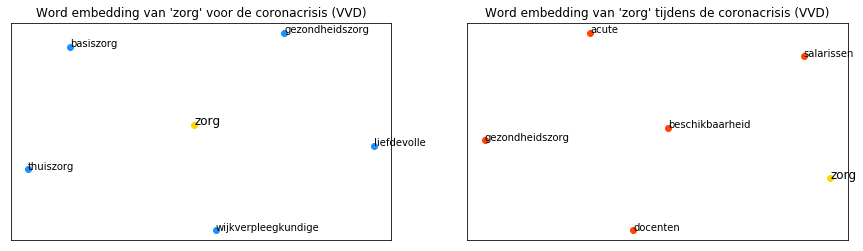

In [69]:
compare('zorg', 'VVD')

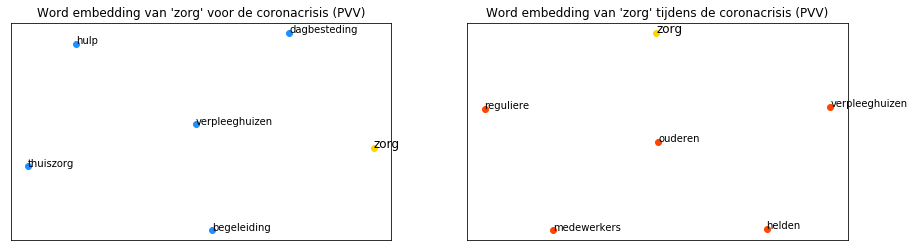

In [70]:
compare('zorg', 'PVV')

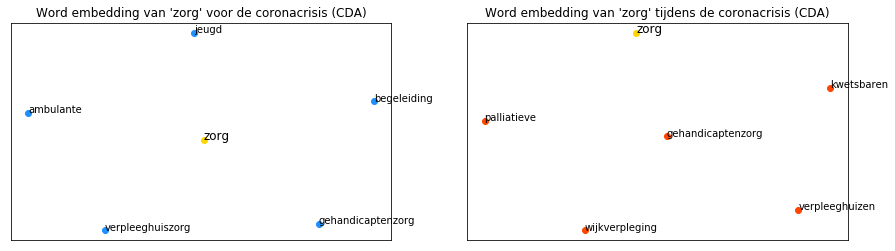

In [71]:
compare('zorg', 'CDA')

The next six plots show the visualized word embeddings for ‘onderwijs’ (education).

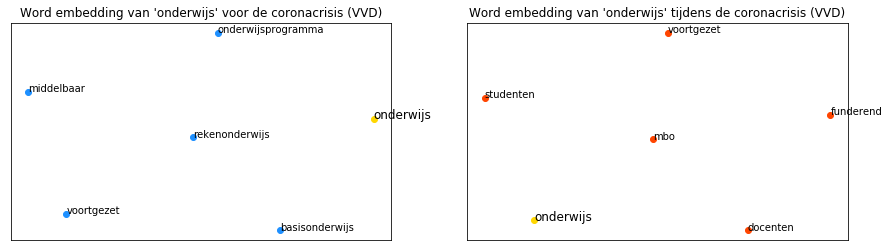

In [72]:
compare('onderwijs', 'VVD')

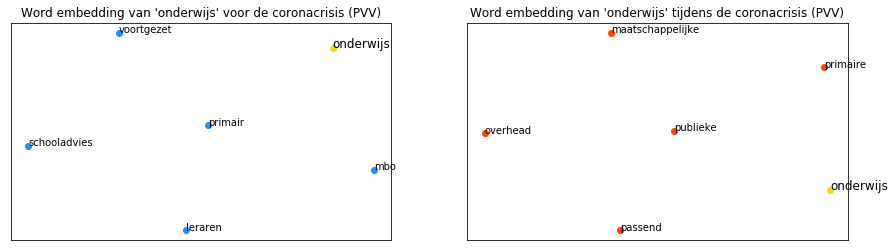

In [73]:
compare('onderwijs', 'PVV')

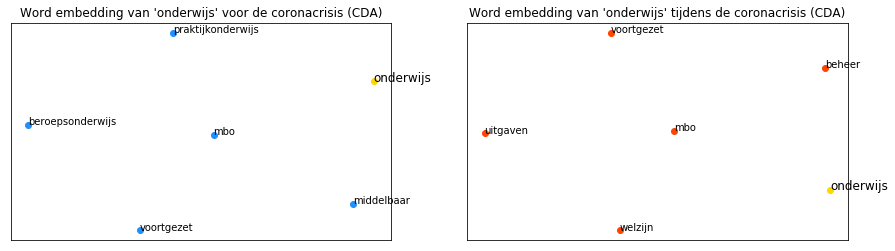

In [74]:
compare('onderwijs', 'CDA')

### Interpretation

As is shown by the plots, the examined parties have changed the way they talk about health care during the corona crisis. Words like ‘salarissen’ (salaries), ‘ouderen/ouderenzorg’ (elderly/elderly care), and ‘kwetsbaren’ (vulnerable people) can be seen in the word embeddings during the corona crisis, but not before. Notably, distinct word embeddings can be seen for each party. ‘Salarissen’ is a part of the word embedding of health care for the VVD, but not for the PVV and CDA. Similarly, the PVV and CDA have words relating to the elderly and vulnerable people in their word embeddings, whereas the VVD does not. For the PVV, 'helden' (heroes) comes up in the word embedding from during the corona crisis. This shows that these parties talk about the issue of health care during the corona crisis differently. They might frame the issue differently or the differences might be a product of differences in priorities concerning the issue.

The results are not as telling for the word embeddings of education. The words in these plots mainly refer to different types of education, such as ‘mbo’ (secondary vocational education), ‘voortgezet’ (secondary), and ‘basisonderwijs’ (primary education). For the most part, this has not changed during the corona crisis.

### Discussion

Firstly, it is important to note that the Word2Vec technique uses randomization internally. This means that the results of this technique will not always be the same. This can also be observed in this research’s results. Although the generated word embeddings are generally consistent, the results do sometimes differ. A larger dataset can help in constructing more consistent results.

Secondly, the interpretation of the results can be much more extensive and meaningful if they were combined with a solid background of the scientific fields to which it has implications: the political and social sciences. If reliable and well-founded conclusions about political parties can be drawn from these results, they might provide a more useful tool to voters. 

## Conclusion

### Summary

The research question for this subsection was: “How has the way political parties talk about major political issues changed during the corona crisis?”

To answer this question, word embeddings for the political issues ‘zorg’ (health care) and ‘onderwijs’ (education) from before and during the corona crisis were examined for the parties VVD, PVV, and CDA. From these word embeddings, it became clear that the way parties talk about health care has changed during the corona crisis, whereas the way they talk about education has not changed much. Salaries, the elderly and vulnerable people became more present in the word embeddings of health care.

### Lessons learned

This subsection shows that NLP, and specifically word embeddings, can be used to create tools that can increase one’s political knowledge. It also shows, however, that for these techniques to truly contribute to the political science field, consistent results must be generated, and thus, large datasets need to be used. To ascribe meaning to the results, collaboration between different fields of science is needed.

### Directions for future work

Within the field of computer science, much can be improved by using techniques such as subsampling to decrease the training time or negative sampling to more accurately train the Word2Vec model for frequent words. Simply having a bigger dataset will definitely improve the results from during the corona crisis, as the dataset for this period is smaller than for the period before the corona crisis. This is, however, not be a viable option when one wants to use the Word2Vec technique to inform voters, for example, on the effects of recent events, as the dataset after a recent event will always be relatively small. 

There are also opportunities for future work within political science and psychology. It would be interesting to see if the model matches findings from political science techniques and if a model like the one outlined in this subsection can truly help to increase political understanding among voters by testing its effects.